# find the region ( Classification)

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## EDA

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

##### Removing Count column 

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [10]:
df.shape

(18249, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


#### changin Date to Datetime

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [17]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

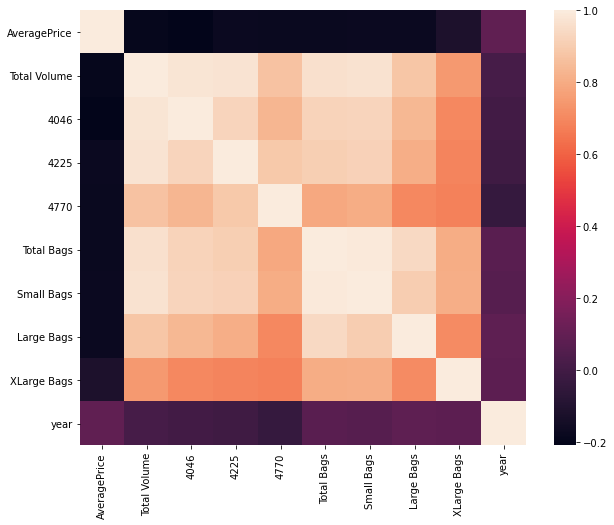

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

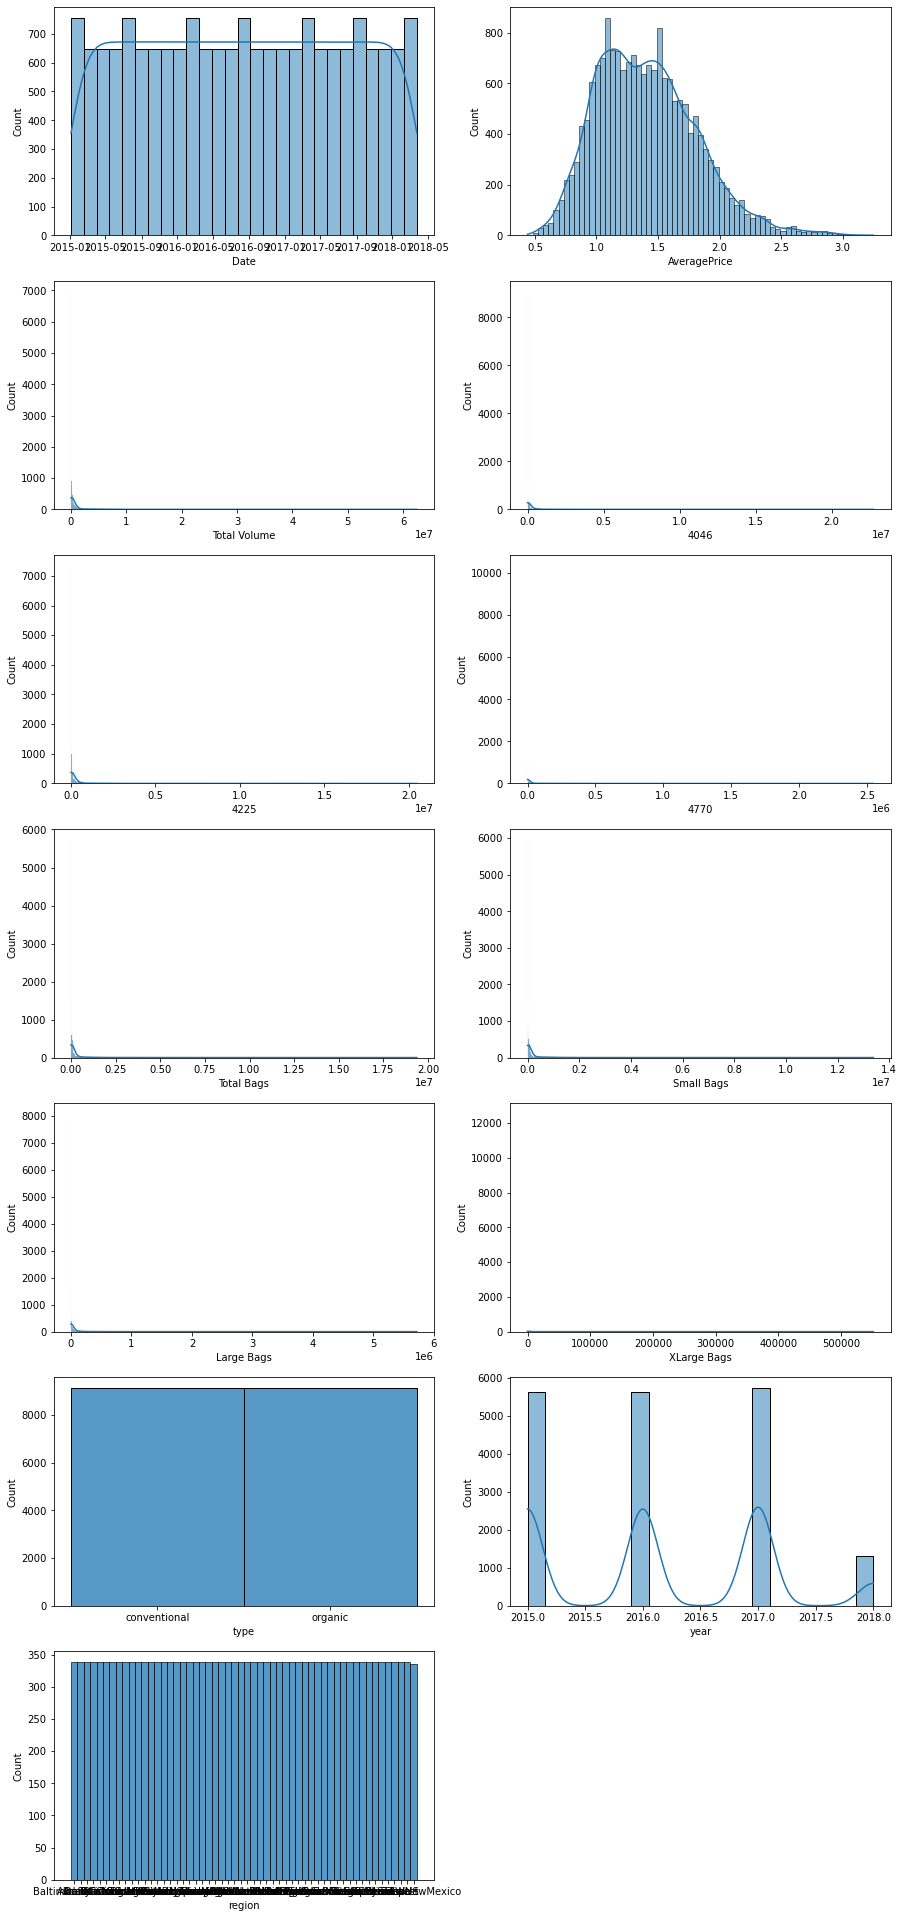

In [19]:
plt.figure(figsize=[15,100])
for i,column_data in enumerate(df.dtypes.items()):
    column, dtype = column_data
    plt.subplot(20,1,i+1)
    if dtype == 'object':
        sns.histplot(df[column])
    else:
        sns.histplot(df[column],kde=True)

##### We can see there lots of skewness in the data

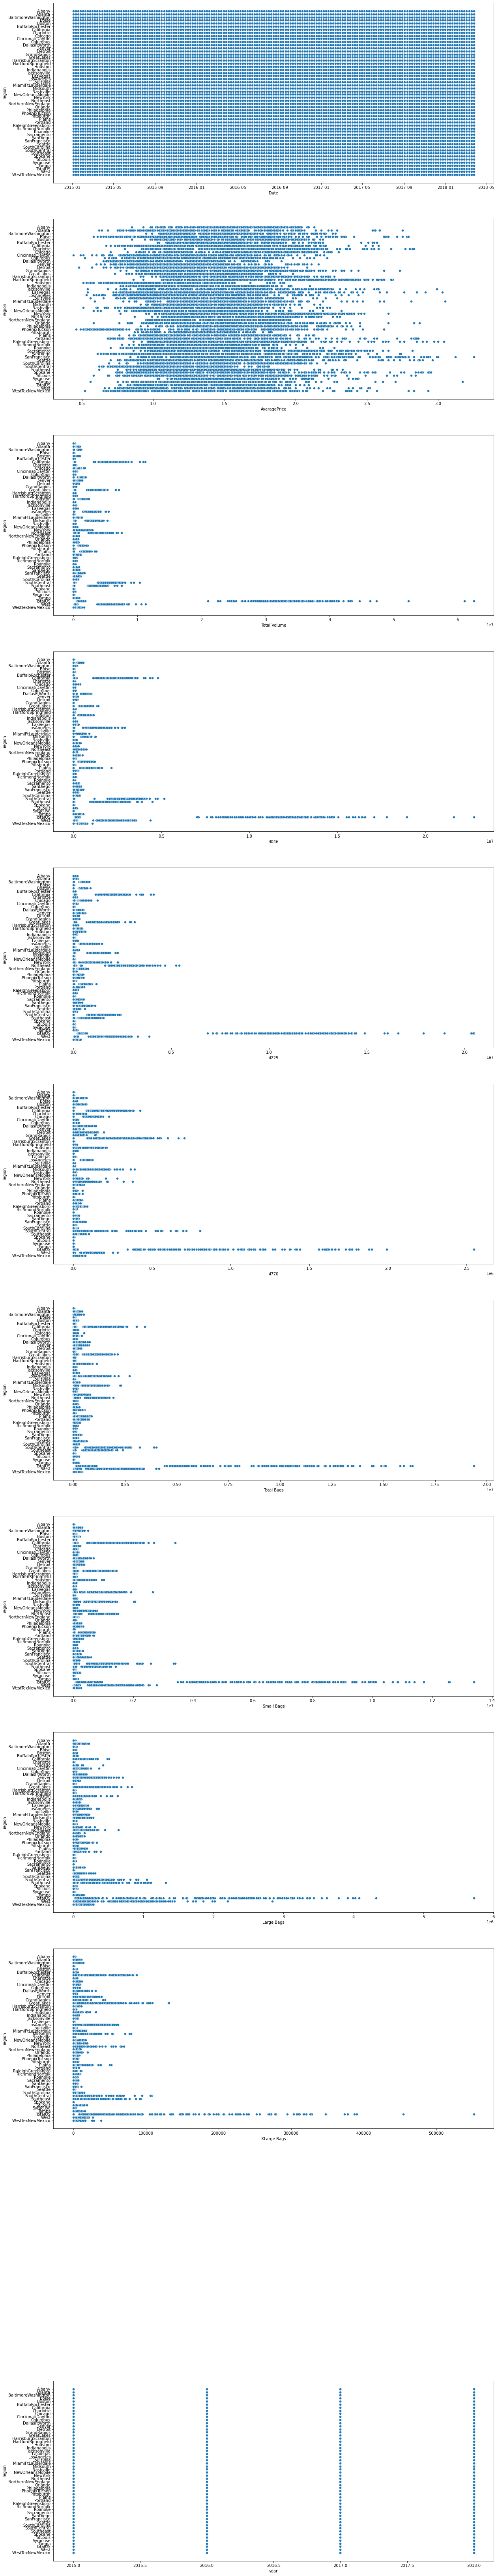

In [27]:
plt.figure(figsize=(20,200))
j = 0
for column, dtype in df.drop(['region'],axis=1).dtypes.items():
    
    j += 1
    if dtype != 'object':
        plt.subplot(20,1,j)
        sns.scatterplot(df[column],df['region'])
       

#### WE can the follwing things
* Most Data is skewned except price
* There is very less X-larage bags is there

### Doing Lable Encoder

In [34]:
df = df.apply(LabelEncoder().fit_transform)

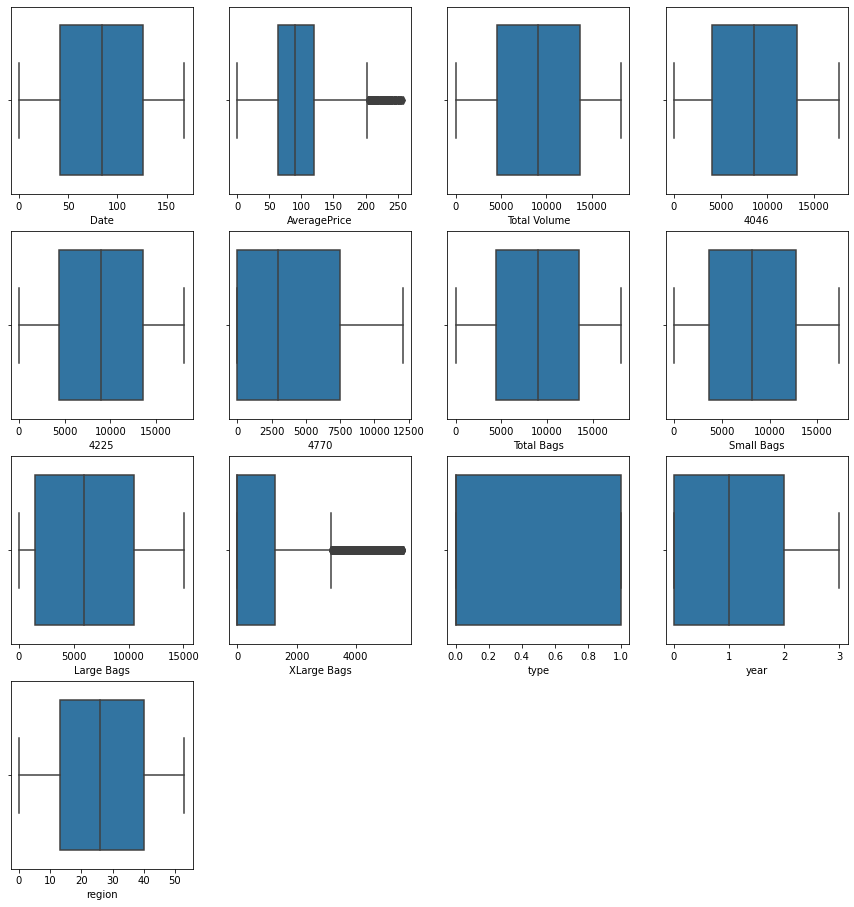

In [35]:
plt.figure(figsize=[15,20])
for i , column in enumerate(df.columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[column])

#### We can there is a ouliers in X larage and average price 

In [39]:
df['region'].value_counts()

0     338
9     338
6     338
22    338
38    338
16    338
23    338
39    338
8     338
25    338
5     338
10    338
26    338
45    338
11    338
27    338
29    338
12    338
13    338
30    338
52    338
19    338
32    338
49    338
2     338
18    338
34    338
15    338
44    338
35    338
51    338
4     338
46    338
20    337
1     337
28    337
50    336
41    336
14    336
33    336
40    336
24    335
31    335
21    333
48    333
7     332
53    332
17    331
36    330
3     329
37    328
47    328
43    326
42    301
Name: region, dtype: int64

## Remoivng Outliers

In [36]:
abs_zscore = stats.zscore(df)
abs_zscore

array([[-0.67635986, -0.18868869, -0.22480975, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.69685742, -0.13900282, -0.27912775, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.71735497, -1.18240612,  0.0519082 , ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [ 1.53737632,  1.15282984, -0.74291995, ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.51687877,  1.30188745, -0.66448171, ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.49638121,  0.53175644, -0.63162502, ...,  1.00016441,
         1.97050371,  1.70081131]])

In [37]:
df[abs_zscore > 3].index

Int64Index([11320, 11321, 11323, 11324, 11325, 11326, 11327, 11328, 11329,
            11330,
            ...
            17250, 17251, 17255, 17300, 17301, 17302, 17303, 17304, 17402,
            17428],
           dtype='int64', length=131)

In [38]:
df.drop(df[abs_zscore > 3].index,axis=0,inplace=True)

## Spliting variable 

In [40]:
X = df.drop('region',axis=1)

In [41]:
y = df['region']

## CHecking VIF

In [42]:
df_info = pd.DataFrame()
df_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
df_info['columns'] = X.columns
df_info.sort_values('VIF',ascending=False)

,VIF,columns
2,247.117000,Total Volume
6,212.969599,Total Bags
7,99.637475,Small Bags
4,60.791253,4225
0,42.560113,Date
3,29.220446,4046
11,25.610572,year
1,12.317232,AveragePrice
8,12.126988,Large Bags
5,7.602138,4770


In [44]:
X['Total Volume_Total Bags_Small Bags_diff'] = X['Total Volume'] - X['Total Bags'] - X['Small Bags']
X.drop(['Total Volume', 'Total Bags', 'Small Bags'],axis=1,inplace=True)

df_info = pd.DataFrame()
df_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
df_info['columns'] = X.columns
df_info.sort_values('VIF',ascending=False)

,VIF,columns
0,41.723722,Date
8,25.510463,year
3,16.666934,4225
2,12.210163,4046
1,11.371406,AveragePrice
9,9.274580,Total Volume_Total Bags_Small Bags_diff
4,7.444346,4770
5,5.863808,Large Bags
7,5.404492,type
6,2.425547,XLarge Bags


#### We have remote lots of co-lineraity now

## Checking Skewness

In [46]:
df.skew().abs().sort_values()

Total Bags      0.003095
4046            0.006429
4225            0.006789
region          0.006878
Date            0.009264
Total Volume    0.009983
type            0.014794
Small Bags      0.037888
Large Bags      0.181088
year            0.224198
AveragePrice    0.400323
4770            0.500235
XLarge Bags     1.599287
dtype: float64

#### Doing POwer Transform

## Train Test Split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,random_state=42)

## Logistic Regression

In [76]:
logisticRegression = LogisticRegression(max_iter=500)
logisticRegression.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [77]:
y_pred = logisticRegression.predict(X_test)

In [78]:
metrics.accuracy_score(y_test,y_pred)

0.4704194260485651

In [79]:
metrics.confusion_matrix(y_test,y_pred)

array([[49,  0,  0, ...,  0,  0,  0],
       [ 0, 25,  0, ...,  0,  0,  1],
       [ 0,  0, 43, ...,  0,  0,  2],
       ...,
       [ 0,  0,  0, ..., 75,  1,  0],
       [ 0,  0,  0, ..., 17, 56,  0],
       [ 0,  4,  0, ...,  0,  0, 15]])

In [80]:
kFold = KFold(n_splits=10,shuffle=True,random_state=42)
np.mean(cross_val_score(LogisticRegression(max_iter=500),X,y,cv=kFold,scoring='accuracy',n_jobs=1))

0.47825439459374464

## DecisionTreeClassifier

In [58]:
decisionTreeClassifier = DecisionTreeClassifier()
decisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred = decisionTreeClassifier.predict(X_test)

In [60]:
metrics.accuracy_score(y_test,y_pred)

0.801766004415011

In [61]:
metrics.confusion_matrix(y_test,y_pred)

array([[68,  0,  0, ...,  0,  0,  0],
       [ 0, 58,  0, ...,  0,  0,  0],
       [ 0,  0, 81, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 76,  0,  0],
       [ 0,  0,  0, ...,  0, 75,  0],
       [ 0,  0,  2, ...,  0,  0, 53]])

In [64]:
print('CV score:',np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=kFold,scoring='accuracy',n_jobs=-1)))

CV score: 0.8140508457635031


## SVC

In [65]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)

SVC(probability=True)

In [66]:
y_pred = svc.predict(X_test)

In [68]:
metrics.accuracy_score(y_test,y_pred)

0.7423841059602649

In [69]:
metrics.confusion_matrix(y_test,y_pred)

array([[78,  0,  0, ...,  0,  0,  0],
       [ 0, 57,  0, ...,  0,  0,  0],
       [ 0,  0, 80, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 71,  4,  0],
       [ 0,  0,  0, ...,  8, 51,  0],
       [ 0,  1,  0, ...,  0,  0, 55]])

In [70]:
print('CV score',np.mean(cross_val_score(SVC(),X,y,cv=kFold,scoring='accuracy',n_jobs=-1)))

CV score 0.7809916831528689


## KNeighborsClassifier

In [71]:
kNeighborsClassifier = KNeighborsClassifier()
kNeighborsClassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [72]:
y_pred = kNeighborsClassifier.predict(X_test)

In [73]:
metrics.accuracy_score(y_test,y_pred)

0.8

In [74]:
metrics.confusion_matrix(y_test,y_pred)

array([[77,  0,  0, ...,  0,  0,  0],
       [ 0, 65,  0, ...,  0,  0,  0],
       [ 0,  0, 79, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 74,  0,  0],
       [ 0,  0,  0, ...,  2, 68,  0],
       [ 0,  0,  0, ...,  0,  0, 61]])

In [75]:
print('CV score:',np.mean(cross_val_score(KNeighborsClassifier(),X,y,cv=kFold,scoring='accuracy',n_jobs=-1)))

CV score: 0.8332054357537881


#### Best modal is DecisionTreeClassifier with 80% score

In [84]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,],
    'min_samples_leaf':[4,5,6,7,8,9,10],
    'splitter' : ['best', 'random'],
    
}
gridSearchCV = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,n_jobs=-1)

In [85]:
gridSearchCV.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [86]:
gridSearchCV.best_score_

0.7814983629901721

In [87]:
gridSearchCV.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [89]:
scores = cross_val_score(
    DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=4,splitter='best'),
    X,
    y,
    cv=kFold,
    scoring='accuracy',
    n_jobs=-1
)

In [90]:
print('score: ',np.mean(scores))
print('std',np.std(scores))

score:  0.8007505945393797
std 0.01053849353285608


## Saving the modal

In [91]:
pickle.dump(decisionTreeClassifier,open('decisionTreeClassifier.pkl','wb'))

# find the average price ( Regression)

In [92]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

import pickle

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [93]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## EDA

In [94]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

##### Removing Count column 

In [95]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [96]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [97]:
df.shape

(18249, 13)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


#### changin Date to Datetime

In [99]:
df['Date'] = pd.to_datetime(df['Date'])

In [100]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [101]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

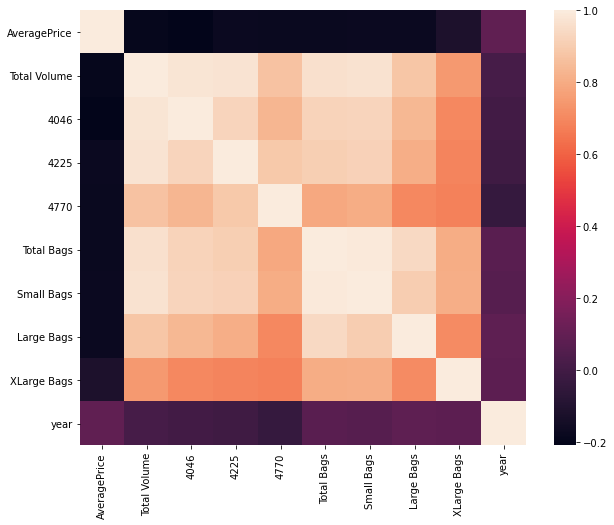

In [102]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

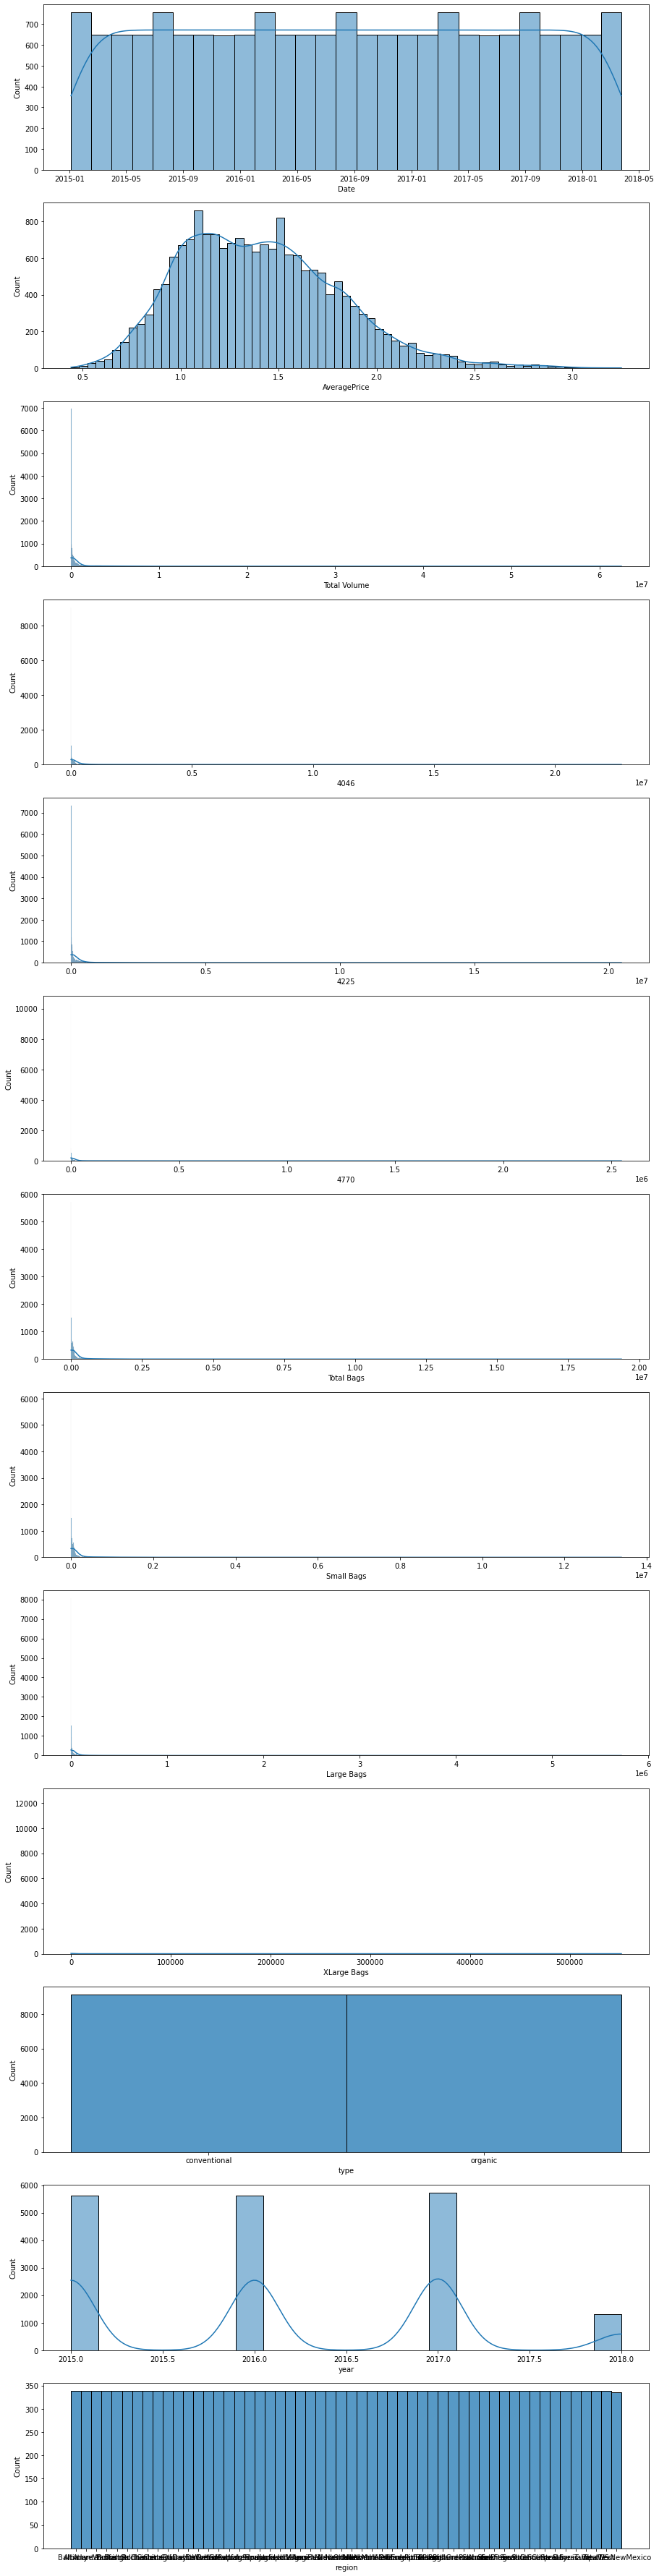

In [103]:
plt.figure(figsize=[15,100])
for i,column_data in enumerate(df.dtypes.items()):
    column, dtype = column_data
    plt.subplot(20,1,i+1)
    if dtype == 'object':
        sns.histplot(df[column])
    else:
        sns.histplot(df[column],kde=True)

##### We can see there lots of skewness in the data

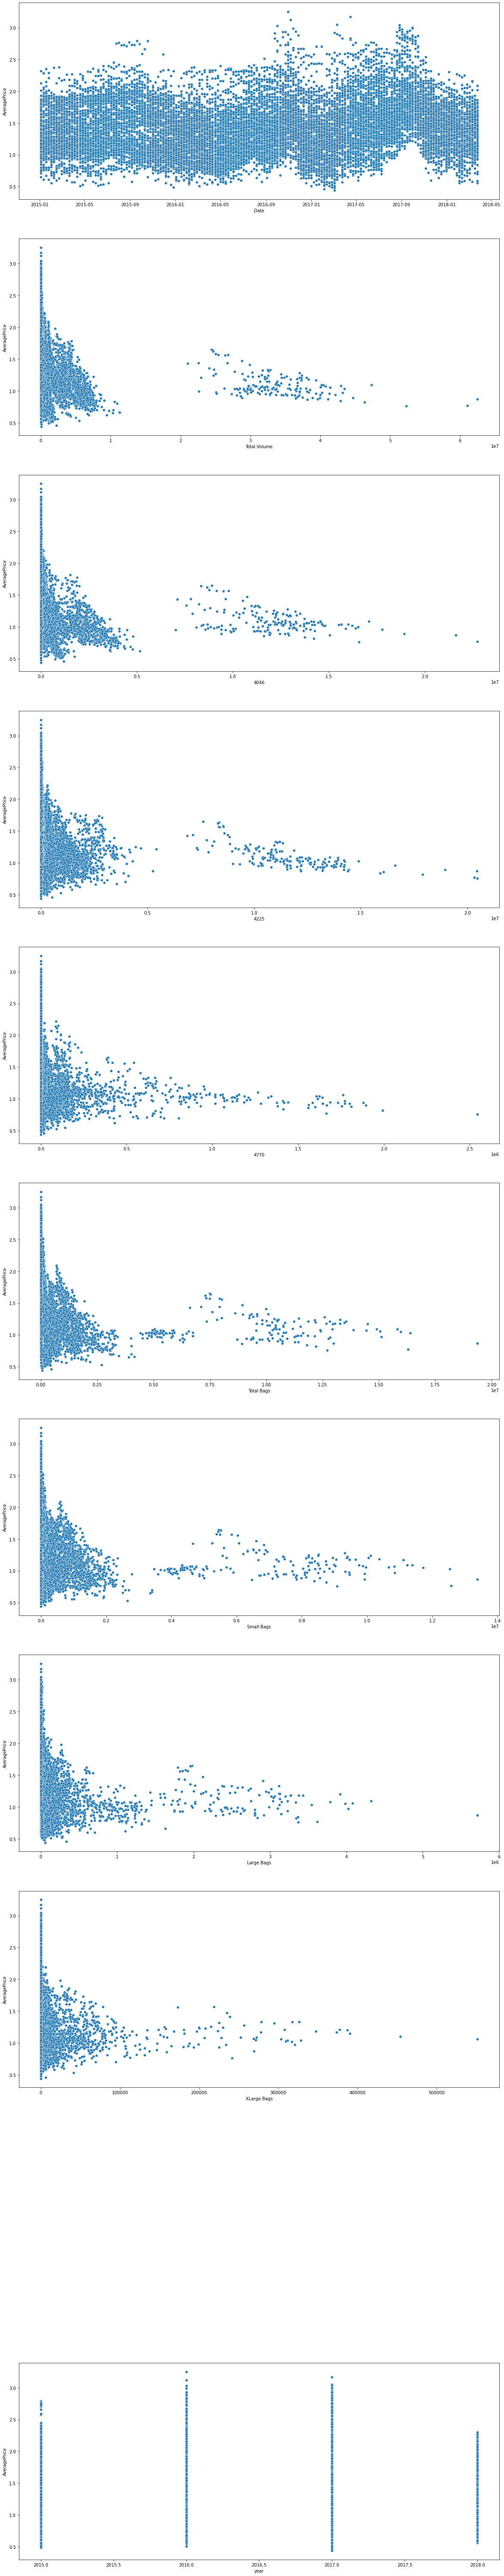

In [105]:
plt.figure(figsize=(20,200))
j = 0
for column, dtype in df.drop(['AveragePrice'],axis=1).dtypes.items():
    j += 1
    if dtype != 'object':
        plt.subplot(20,1,j)
        sns.scatterplot(df[column],df['AveragePrice'])

### Doing Lable Encoder

In [109]:
df = df.apply(LabelEncoder().fit_transform)

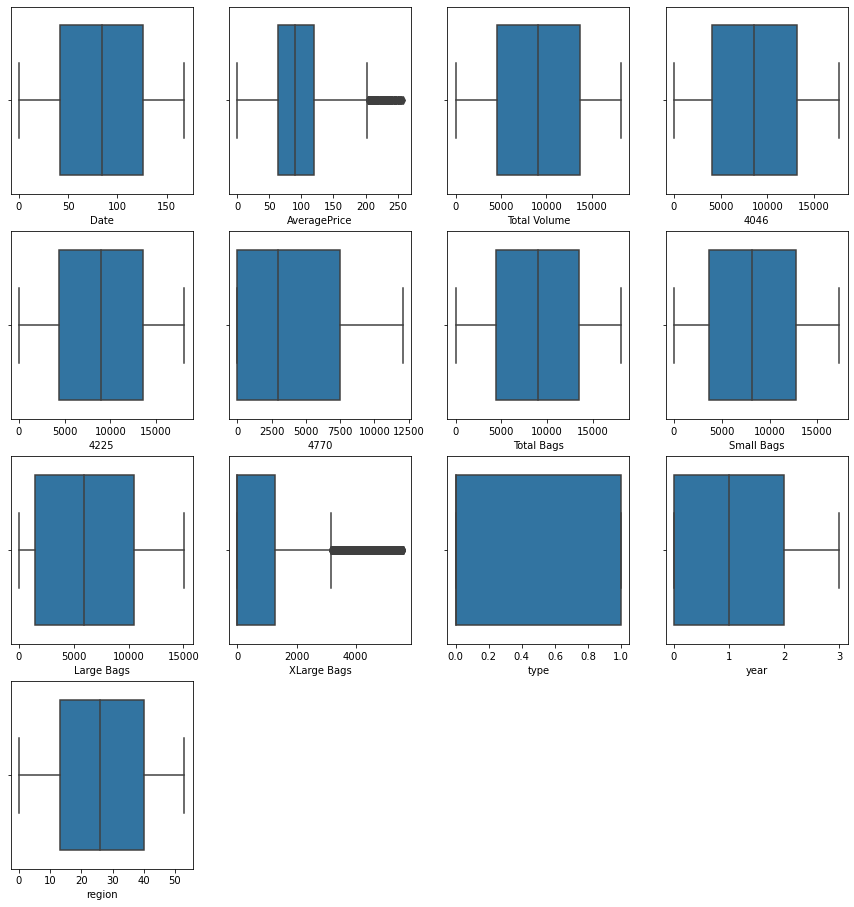

In [110]:
plt.figure(figsize=[15,20])
for i , column in enumerate(df.columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[column])

#### We can there is a ouliers in X larage and average price 

## Remoivng Outliers

In [111]:
abs_zscore = stats.zscore(df)
abs_zscore

array([[-0.67635986, -0.18868869, -0.22480975, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.69685742, -0.13900282, -0.27912775, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.71735497, -1.18240612,  0.0519082 , ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [ 1.53737632,  1.15282984, -0.74291995, ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.51687877,  1.30188745, -0.66448171, ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.49638121,  0.53175644, -0.63162502, ...,  1.00016441,
         1.97050371,  1.70081131]])

In [112]:
df[abs_zscore > 3].index

Int64Index([11320, 11321, 11323, 11324, 11325, 11326, 11327, 11328, 11329,
            11330,
            ...
            17250, 17251, 17255, 17300, 17301, 17302, 17303, 17304, 17402,
            17428],
           dtype='int64', length=131)

In [113]:
df.drop(df[abs_zscore > 3].index,axis=0,inplace=True)

## Spliting variable 

In [114]:
X = df.drop('AveragePrice',axis=1)

In [115]:
y = df['AveragePrice']

## CHecking VIF

In [116]:
df_info = pd.DataFrame()
df_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
df_info['columns'] = X.columns
df_info.sort_values('VIF',ascending=False)

,VIF,columns
1,245.430446,Total Volume
5,208.930692,Total Bags
6,96.989175,Small Bags
3,53.786648,4225
0,35.198532,Date
2,31.024516,4046
10,23.510778,year
7,12.104886,Large Bags
4,7.601503,4770
11,4.200746,region


In [117]:
X['Total Volume_Total Bags_Small Bags_diff'] = X['Total Volume'] - X['Total Bags'] - X['Small Bags']
X.drop(['Total Volume', 'Total Bags', 'Small Bags'],axis=1,inplace=True)

df_info = pd.DataFrame()
df_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
df_info['columns'] = X.columns
df_info.sort_values('VIF',ascending=False)

,VIF,columns
0,35.145407,Date
7,23.478629,year
2,14.450139,4225
1,13.361922,4046
9,9.206205,Total Volume_Total Bags_Small Bags_diff
3,7.440396,4770
4,5.394193,Large Bags
8,4.134815,region
6,2.799738,type
5,2.435168,XLarge Bags


#### We have remote lots of co-lineraity now

## Checking Skewness

In [118]:
df.skew().abs().sort_values()

Total Bags      0.003095
4046            0.006429
4225            0.006789
region          0.006878
Date            0.009264
Total Volume    0.009983
type            0.014794
Small Bags      0.037888
Large Bags      0.181088
year            0.224198
AveragePrice    0.400323
4770            0.500235
XLarge Bags     1.599287
dtype: float64

#### Doing POwer Transform

## Train Test Split

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,random_state=42)

## Logistic Regression

In [120]:
linearRegression = LinearRegression()
linearRegression.fit(X_train,y_train)

LinearRegression()

In [121]:
y_pred = linearRegression.predict(X_test)

In [125]:
mean_absolute_error(y_test,y_pred)

21.147224049133005

In [126]:
mean_squared_error(y_test,y_pred)

711.2465234111571

In [127]:
r2_score(y_test,y_pred)

0.5141320695240807

In [128]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    LinearRegression(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.5088391629973761
std:  0.014918777816795918


## ridge

In [58]:
ridge = Ridge()
ridge.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred = ridge.predict(X_test)

In [129]:
mean_absolute_error(y_test,y_pred)

21.147224049133005

In [130]:
mean_squared_error(y_test,y_pred)

711.2465234111571

In [131]:
r2_score(y_test,y_pred)

0.5141320695240807

In [132]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    Ridge(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.5088393020704783
std:  0.0149145367553867


## DecisionTreeRegressor

In [133]:
decisionTreeRegressor = DecisionTreeRegressor()
decisionTreeRegressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [134]:
y_pred = decisionTreeRegressor.predict(X_test)

In [135]:
mean_absolute_error(y_test,y_pred)

11.954525386313465

In [136]:
mean_squared_error(y_test,y_pred)

341.4101545253863

In [140]:
r2_score(y_test,y_pred)

0.7667753166270013

#### CV

In [139]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    DecisionTreeRegressor(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.7962556521761257
std:  0.019227348568486652


## KNeighborsRegressor

In [142]:
kNeighborsRegressor = KNeighborsRegressor()
kNeighborsRegressor.fit(X_train,y_train)

KNeighborsRegressor()

In [143]:
y_pred = kNeighborsRegressor.predict(X_test)

In [144]:
mean_absolute_error(y_test,y_pred)

13.49487858719647

In [145]:
mean_squared_error(y_test,y_pred)

375.7629757174393

In [74]:
metrics.confusion_matrix(y_test,y_pred)

array([[77,  0,  0, ...,  0,  0,  0],
       [ 0, 65,  0, ...,  0,  0,  0],
       [ 0,  0, 79, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 74,  0,  0],
       [ 0,  0,  0, ...,  2, 68,  0],
       [ 0,  0,  0, ...,  0,  0, 61]])

In [148]:
r2_score(y_test,y_pred)

0.7433081591939611

#### CV

In [149]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    KNeighborsRegressor(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.7576501547322347
std:  0.016653492426364578


## SVR

In [150]:
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [151]:
y_pred = svr.predict(X_test)

In [152]:
mean_absolute_error(y_test,y_pred)

21.925312814799835

In [153]:
mean_squared_error(y_test,y_pred)

781.6113785143962

In [154]:
r2_score(y_test,y_pred)

0.46606431045331287

#### CV

In [156]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    SVR(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.4662739107897851
std:  0.022133792589330275


## XGBRegressor

In [171]:
xGBRegressor = XGBRegressor()

In [172]:
xGBRegressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [173]:
y_pred = xGBRegressor.predict(X_test)

In [174]:
mean_absolute_error(y_test,y_pred)

8.59175612200175

In [175]:
mean_squared_error(y_test,y_pred)

135.80244539400493

In [176]:
r2_score(y_test,y_pred)

0.9072304033477696

#### CV

In [177]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    XGBRegressor(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.9119827088160951
std:  0.007001066448353875


## RandomForestRegressor

In [178]:
randomForestRegressor = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [179]:
randomForestRegressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [180]:
y_pred = randomForestRegressor.predict(X_test)

In [181]:
mean_absolute_error(y_test,y_pred)

8.406966887417218

In [182]:
mean_squared_error(y_test,y_pred)

141.59385889624724

In [183]:
r2_score(y_test,y_pred)

0.9032741631409712

#### CV

In [184]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    RandomForestRegressor(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.9108826526264068
std:  0.0060500193048390865


#### Best modal is XGBRegressor and RandomForestRegressor with 80% score

#### GridSearchCV for XGBRegressor

In [199]:
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators' : [100, 200],
}
gridSearchCV = GridSearchCV(XGBRegressor(),param_grid=param_grid,n_jobs=-1)

In [200]:
gridSearchCV.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [201]:
gridSearchCV.best_score_

0.9118390739119284

In [202]:
gridSearchCV.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 200}

#### GridSearchCV for RandomForestRegressor

In [195]:
param_grid = {
    'max_depth': [10, 20,],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 300,]
    }
gridSearchCV = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1)

In [196]:
gridSearchCV.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300]})

In [197]:
gridSearchCV.best_score_

0.8931831523859867

In [198]:
gridSearchCV.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [89]:
scores = cross_val_score(
    DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=4,splitter='best'),
    X,
    y,
    cv=kFold,
    scoring='accuracy',
    n_jobs=-1
)

In [203]:
print('score: ',np.mean(scores))
print('std',np.std(scores))

score:  0.9108826526264068
std 0.0060500193048390865


#### The best modal is DecisionTreeClassifier

In [204]:
xGBRegressor = XGBRegressor(
        learning_rate = 0.1,
        max_depth = 7,
        min_child_weight = 3,
        n_estimators =200
    )

In [205]:
xGBRegressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [206]:
y_pred = xGBRegressor.predict(X_test)

In [207]:
mean_absolute_error(y_test,y_pred)

8.099969849470698

In [208]:
mean_squared_error(y_test,y_pred)

122.48871932756501

In [209]:
r2_score(y_test,y_pred)

0.9163252984620548

## Saving the modal

In [210]:
pickle.dump(xGBRegressor,open('xGBRegressor.pkl','wb'))